# Communicate Data Findings

# Ford GoBike System Data

**Introduction**

This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco Bay area And I'm going to explore this data to get some observations and answers of some questions.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [43]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


**(A) Data Wrangling**

**Assessment & Cleaning**

In [44]:
#Find the number of rows in the dataset
df.shape

(183412, 16)

In [45]:
#Check if there is a miising values 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [46]:
#Check the number of misssing values in each column
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [47]:
#As the number of missing values cells is not large I choose to delete this rows from the data 
df.dropna(inplace=True)

In [48]:
#Find the number of rows in the dataset after deleting missing values
df.shape[0]

174952

In [49]:
#Find the data types of each variable
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [50]:
#Convert the data type of (start_time & end_time) to datatime instead of string
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [51]:
#Convert the data type of (start_station_id & end_station_id) to int instead of float
df['start_station_id'] = df['start_station_id'].astype(int)
df['end_station_id'] = df['end_station_id'].astype(int)

In [52]:
#Convert the data type of (member_birth_year) to int instead of float
df['member_birth_year'] = df['member_birth_year'].astype(int)

In [53]:
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int32
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int32
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                   int32
member_gender                      object
bike_share_for_all_trip            object
dtype: object

In [54]:
#Check the number of unique values in each column
df.nunique()

duration_sec                 4429
start_time                 174941
end_time                   174939
start_station_id              329
start_station_name            329
start_station_latitude        329
start_station_longitude       329
end_station_id                329
end_station_name              329
end_station_latitude          329
end_station_longitude         329
bike_id                      4607
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [55]:
#Check if there is a duplicated rows 
sum(df.duplicated())

0

In [56]:
#Checking the discription of the dataset
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [57]:
# According to the description the min of member birth year is 1878 and this is not logic /
#so I will check if there is a lot of members that their birthday is less than 1900 
df.query('member_birth_year < 1900')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878,Female,No


In [58]:
#I will drop this row to not affect negatively on the accuracy of data exploring
df = df.drop(27370)

**(B) Data Exploration**

**Q1/ Which gender is more of total members ?**

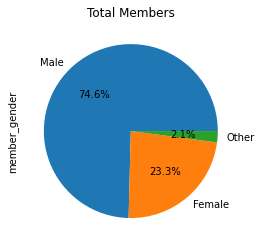

In [59]:
#Plot a pie chart for the categorical variable (member_gender)
df['member_gender'].value_counts().plot(kind='pie',autopct='%1.1f%%');
plt.title('Total Members')
plt.show()

A1/ The males members are much more than females. 

**Q2/ The most of users are customers or subscribers ?**

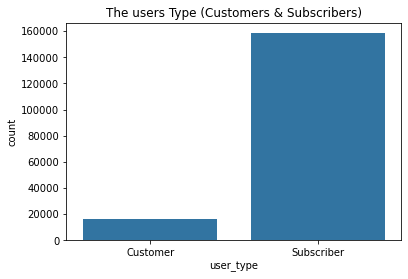

In [60]:
#Plot a bar chart for the categorical variable (user_type)
bas_color = sb.color_palette()[0]
sb.countplot(data=df, x= 'user_type', color=bas_color);
plt.title('The users Type (Customers & Subscribers)');

A2/ The most of users are subscribers not customers.

**Q3/ What is the age of the most members ?**

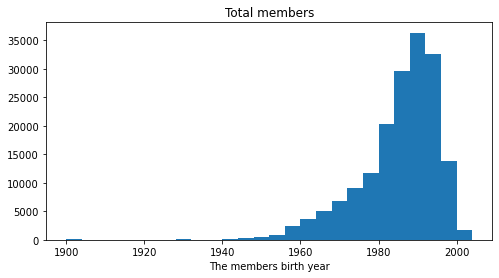

In [62]:
#Plot a histogram for the quantitative variable (member_birth_year)
plt.figure(figsize = [8, 4]) 
bins = np.arange(1900, df['member_birth_year'].max()+4, 4)
plt.hist(data = df, x = 'member_birth_year',bins = bins);
plt.xlabel('The members birth year')
plt.title('Total members')
plt.show()

A3/ The hight age range of the members is whos birth year from 1985 to 1995

**Q4/ What is the most duration of the trips ? Is it be used for short or long trips ?**

In [63]:
df['duration_sec'] = df['duration_sec'].astype(int)

In [64]:
#Create if Function to sort the trips durations into specific categories
def Trip_Dura (duration_sec):
    if duration_sec <= 600:
        return 'below 10 min'
    elif duration_sec <= 1200 >600:
        return '10 to 20 min'
    elif duration_sec <= 1800 >1200:
        return '20 to 30 min'
    elif duration_sec <= 2400 >1800:
        return '30 to 40 min'
    elif duration_sec <= 3000 >2400:
        return '40 to 50 min'
    elif duration_sec <= 3600 >3000:
        return '50 to 60 min'
    elif duration_sec >3600:
        return 'Above 60 min'
df['Trip_Dura'] = df.apply(lambda x: Trip_Dura(x['duration_sec']), axis=1)

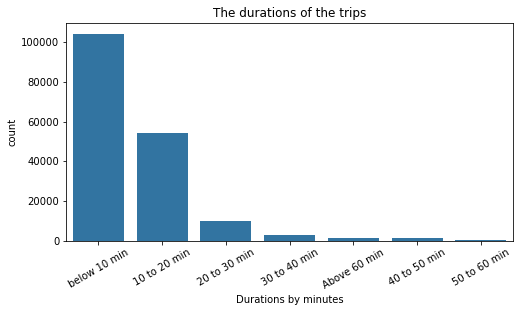

In [65]:
#Plot a bar chart for the categorical variable (Trip_Dura)
plt.figure(figsize = [8, 4]) 
bas_color = sb.color_palette()[0]
ored = df['Trip_Dura'].value_counts().index
sb.countplot(data=df, x= 'Trip_Dura', color=bas_color, order=ored);
plt.xlabel('Durations by minutes')
plt.title('The durations of the trips')
plt.xticks(rotation=30)
plt.show()

A4/The most trips durations are less than 10 minutes, So it uesd for the very short trips.

**Q5/ What is the most common start & end stations names ?**

In [66]:
com_stat = df['start_station_name'].mode()[0]
Com_end = df['end_station_name'].mode()[0]
print('The most common start station is {}'.format(com_stat))
print('The most common end station is {}'.format(Com_end))

The most common start station is Market St at 10th St
The most common end station is San Francisco Caltrain Station 2  (Townsend St at 4th St)


In [67]:
#split the Date and Time of start time column into columns to be able to get some insights from it.
df['S_year'] = df['start_time'].dt.year
df['S_month'] = df['start_time'].dt.month
df['S_day'] = df['start_time'].dt.day
df['S_hour'] = df['start_time'].dt.hour

In [68]:
#Ceck The number of years that the dataset contain
df['S_year'].unique()[0]

2019

In [69]:
df['S_month'].unique()[0]

2

The dataset contain only the february month of 2019.

**Q6/ Are the high or low traffic days are the same for males and females ?**

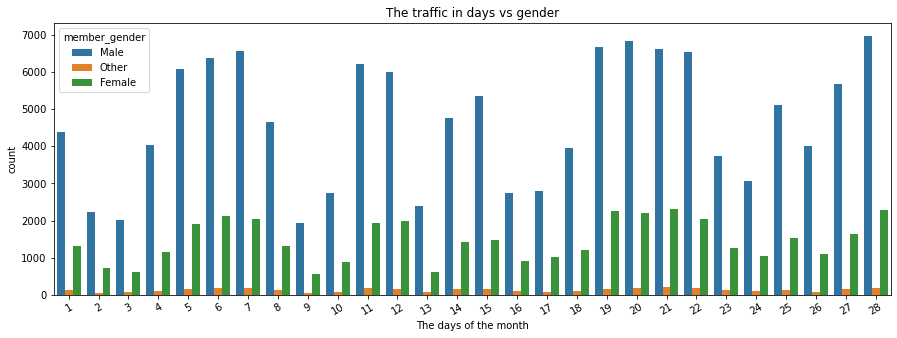

In [70]:
#plot clustered Bar Chart to check the relationship between the days and members gender
plt.figure(figsize = [15, 5]) 
bins = np.arange(1, df['S_day'].max()+6, 6)
sb.countplot(data = df, x = 'S_day', hue = 'member_gender');
plt.xlabel('The days of the month')
plt.title('The traffic in days vs gender')
plt.xticks(rotation=30);

A6/ The high or low traffic days are the same for males and females.

**Q7/ What is the most rush hour for both subscribers & customers ?**

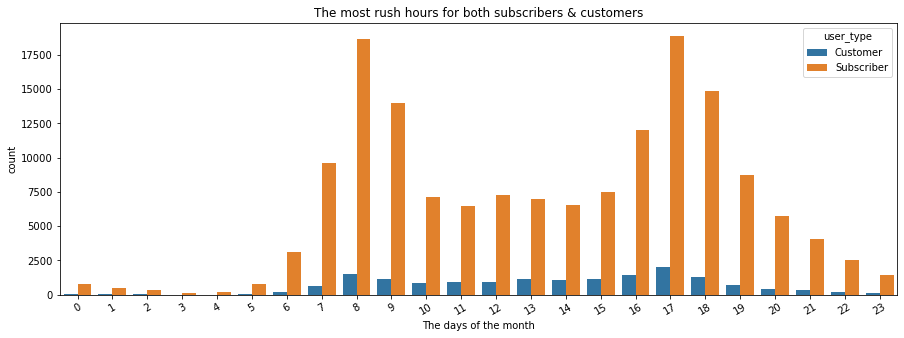

In [71]:
#plot clustered Bar Chart to check the relationship between rush hour and user types
plt.figure(figsize = [15, 5]) 
bins = np.arange(1, df['S_hour'].max()+6, 6)
sb.countplot(data = df, x = 'S_hour', hue = 'user_type');
plt.xlabel('The days of the month')
plt.title('The most rush hours for both subscribers & customers')
plt.xticks(rotation=30);

A7/ The rush hours are the same for subscribers & customers and they are 8/9 am and 5/7 pm.

**Q8/ Who has the longer trip duration, males or females ?**

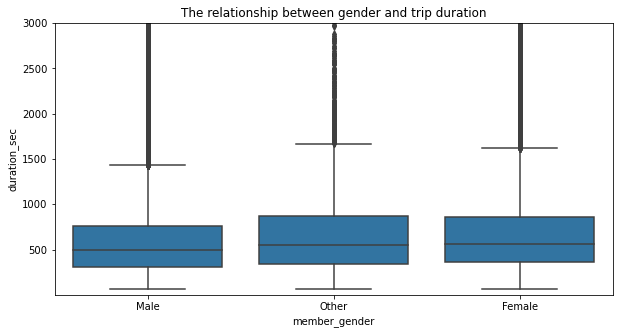

In [72]:
#plot boxplot to check the relationship between gender and trip duration / 
#Using the boxplot as one of these variables is categorecal and the other is quantative
plt.figure(figsize = [10, 5])
base_color = sb.color_palette()[0]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color =base_color);
plt.ylim([1, 3000])
plt.title('The relationship between gender and trip duration');

A8/ Females and other gender have a longer trip duration than males.

**Q9/What is the top 10 start stations, and are males are more than females in all these top stations ?**

In [73]:
#Sort the top ten start stations
top_10start_station = df['start_station_name'].value_counts().head(10).index
print(top_10start_station)

Index(['Market St at 10th St',
       'San Francisco Caltrain Station 2  (Townsend St at 4th St)',
       'Berry St at 4th St',
       'Montgomery St BART Station (Market St at 2nd St)',
       'Powell St BART Station (Market St at 4th St)',
       'San Francisco Caltrain (Townsend St at 4th St)',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       'Howard St at Beale St', 'Steuart St at Market St',
       'Powell St BART Station (Market St at 5th St)'],
      dtype='object')


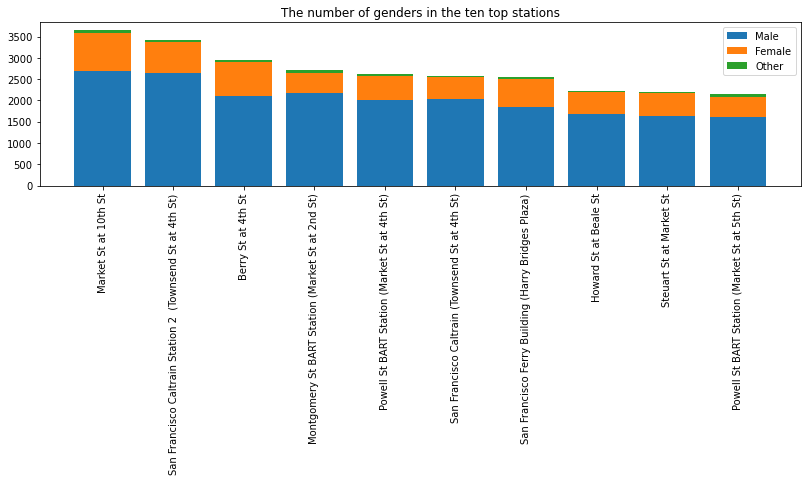

In [85]:
#Plot a stacked bar chart to check if the number of males still much more than females in all start station
Orderedx = top_10start_station
Orderedhue = ['Male', 'Female','Other']
plt.figure(figsize = [30,3])
plt.subplot(1, 2, 2)
baselines = np.zeros(len(Orderedx))
for i in range(len(Orderedhue)):
    gender = Orderedhue[i]
    plot_data = df[df['member_gender'] == gender]['start_station_name'].value_counts()
    plt.bar(x = np.arange(len(Orderedx)), height = plot_data[Orderedx],
            bottom = baselines)
    baselines += plot_data[Orderedx]
plt.xticks(np.arange(len(Orderedx)), Orderedx)
plt.legend(Orderedhue)
plt.title('The number of genders in the ten top stations')
plt.xticks(rotation=90);

A9/ The number of males is more than the females and other gender in all top ten start stations. 

**Q10/ Who has the longer trip duration, subscribers or customers during the days of the month ?**

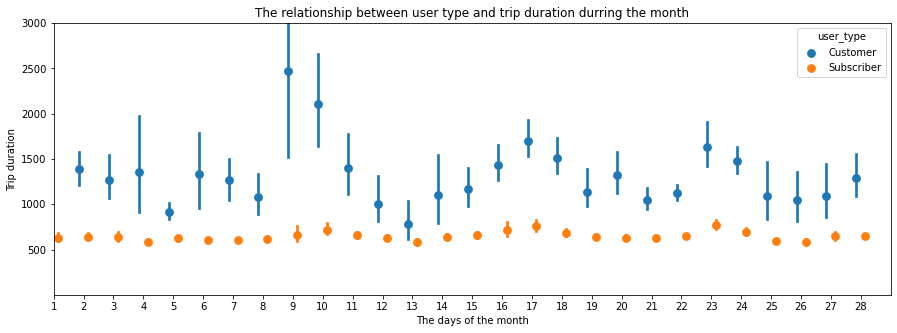

In [75]:
#plot a pointplot to check the relationship between user type and trip duration durring the month
plt.figure(figsize = [15,5])
sb.pointplot(data=df, x='S_day', y='duration_sec', hue='user_type', dodge=0.3, linestyles="");
plt.ylim([1, 3000])
plt.xlim([0, 28])
plt.ylabel('Trip duration');
plt.xlabel('The days of the month');
plt.title('The relationship between user type and trip duration durring the month');

A10/ Customers have a longer trip duration than subscribers during the month.

**Q11/ What is the relationship between the start hour, members age and trip duration ?**

In [76]:
#Create a new column of the members ages to be easier to use than the birth year
from datetime import date
def Member_Age(member_birth_year):
    today = date.today()
    return today.year - member_birth_year
df['Member_Age'] = df.apply(lambda x: Member_Age(x['member_birth_year']), axis=1)

In [36]:
df.shape

(174951, 22)

In [37]:
df.head(0)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Trip_Dura,S_year,S_month,S_day,S_hour,Member_Age


<AxesSubplot:>

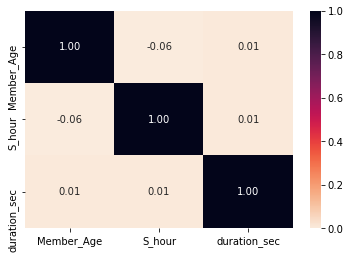

In [77]:
#plot a heatmap with .corr function to create a correlation matrix For the mentioned three numeric variables
num_Varia = ['Member_Age', 'S_hour', 'duration_sec']
sb.heatmap(df[num_Varia].corr(), annot = True, fmt = '.2f', cmap = 'rocket_r', vmin = 0)

A11/ There is no relatively high correlation between the variables / 
And there is a negative correlation between the start hour and members age.